## IMPORTING MODELS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:
data_frame = pd.read_csv("metadata.csv")
data_frame

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,ERR2172350,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3782,ERR2172351,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3783,ERR2172352,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3784,ERR2172353,2015.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
data_frame.columns

Index(['Sample_ID', 'Year', 'Country', 'Continent', 'Beta.lactamase',
       'Azithromycin', 'Ciprofloxacin', 'Ceftriaxone', 'Cefixime',
       'Tetracycline', 'Penicillin', 'NG_MAST', 'Group', 'azm_mic', 'cip_mic',
       'cro_mic', 'cfx_mic', 'tet_mic', 'pen_mic', 'log2_azm_mic',
       'log2_cip_mic', 'log2_cro_mic', 'log2_cfx_mic', 'log2_tet_mic',
       'log2_pen_mic', 'azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr',
       'pen_sr'],
      dtype='object')

In [4]:
phenotype = 'cfx_sr'
pheno = pd.read_csv('metadata.csv', index_col=0).dropna( subset=[phenotype])[phenotype]
X = pd.read_csv(r'/Users/zee/Dev/Project-I:IT/MiniProject/Project1/{}_gwas_filtered_unitigs.Rtab'.format(phenotype), sep=" ", index_col=0).transpose()
X = X[X.index.isin(pheno.index)]
pheno = pheno[pheno.index.isin(X.index)]


In [5]:
X

pattern_id,ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT,TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG,CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG,GATATAACTGCGTCCGTCGGCATATTCGCCC,ACCCCGCAACACCTCCTGCTCAACCGCAACGACCTCTTGGTCGGCGG,GGGAAAGGGTAACGTTTGCCGGCGGGGCGGTTGAGGTTGGCGGTT,CAAACTCGAACAGAAAGGCAAGTCGTTTATCTGG,AACCGAGCCGGGCGGCACCGGTACGGCGGGT,GCTTGTCGATGTGCCGGTTGATGTTTTGAGAAACAAACTCGAACAGAAA,GACAAATTCTTGGCGGACGATGACGGCAACAGTACCGAGCGCGGCACCCAATGCCAGCGCG,...,CATGTCTTTCGGTTATGGCCTGCAATTAAGC,GGCACGGTTGCGCCGCTGTTCGCTGTCTGCCCGGCCGGG,AAAACCGCCATCAGTTTTCCGCTCATCGGAGGA,TTGTTTTTCAAAGCTGACCGGCAACAATTCGCCGTCATGGGTCAAGACAGTATAGGCACG,TTGCCCGTAGTGACGATTTCTACGTTCAGGTTTGCTTCGATCGGAAATTGG,GTCGATGTTTTGAGGAACAAACTCGAACAGAAA,ACCGCCATCAGTTTTCCGCTCATCGGAGGAAGGG,"TCCCAACAGACCCGGCCGGGCAGACAGCGAACAG,GACGGTTTCTTTATTTGATTTGAACGGAAAAACCAT,CGTCAAAGACGCCAACGACGCCGGCACCAAAATCGACAC,CCATCAAAACCGCCATCAGTTTTCCGCTCATCGGA,CCAAGCCACGTCGGCATTCGGTTTCGAGCCGATGTCCA,TTCAGGCTGCCGCCCATAATTTTTTTGAAGGGC",GGAACGCCTGTCCGAGCTTGTCGATGTGCCGGT,CAGCGCATCGGTCATTGTCGGACTCGAGCCGCTGCTGATG
SRR1661154,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
SRR1661156,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
SRR1661157,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
SRR1661158,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
SRR1661159,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR5827366,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
SRR5827371,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
SRR5827372,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
SRR5827369,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [6]:
pheno

Sample_ID
SRR1661154    0.0
SRR1661156    0.0
SRR1661157    0.0
SRR1661158    0.0
SRR1661159    0.0
             ... 
SRR5827366    0.0
SRR5827371    0.0
SRR5827372    0.0
SRR5827369    0.0
SRR5827370    0.0
Name: cfx_sr, Length: 3401, dtype: float64

## MODEL

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split( X, pheno, test_size=0.30, random_state=32)

In [8]:
input_dim = X_train.shape[1]
output_dim = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_dim=input_dim),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=output_dim, activation='sigmoid')
])

model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=7, batch_size=32, validation_split=0.2)


Epoch 1/7
60/60 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9527 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 2/7
60/60 [==============================] - 0s 752us/step - loss: 0.0161 - accuracy: 0.9989 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3/7
60/60 [==============================] - 0s 719us/step - loss: 0.0108 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 4/7
60/60 [==============================] - 0s 705us/step - loss: 0.0094 - accuracy: 0.9989 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/7
60/60 [==============================] - 0s 702us/step - loss: 0.0090 - accuracy: 0.9989 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/7
60/60 [==============================] - 0s 701us/step - loss: 0.0086 - accuracy: 0.9989 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/7
60/60 [==============================] - 0s 688us/step - loss: 0.0085 - accuracy: 0.9989 - val_loss: 0.0014 - val_accuracy: 1.0000


In [9]:
model.evaluate(X_test,Y_test)


32/32 [==============================] - 0s 367us/step - loss: 0.0219 - accuracy: 0.9971


[0.021876787766814232, 0.9970617294311523]

In [10]:
model.evaluate(X_train,Y_train)

75/75 [==============================] - 0s 355us/step - loss: 0.0070 - accuracy: 0.9992


[0.006980730686336756, 0.9991596341133118]

In [11]:
weights = model.layers[0].get_weights()[0]
sum_weights = np.abs(weights).sum(axis=1)

In [12]:
top_indices = sum_weights.argsort()[-4:][::-1]
var_cols = X_train.columns[top_indices]

In [13]:
for i in range (0,len(var_cols)):
    print(var_cols[i])

TACGGCGGGTGCGGTGGACGGTTTCGATGTCGG
CCGCCCTTCAAAAAAATTATGGGCGGCAGCC
ATATAACTGCGTCCGTCGGCATATTCGCCCGG
CGCCGAAGAAATGTATGACTTCTATCATGAA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


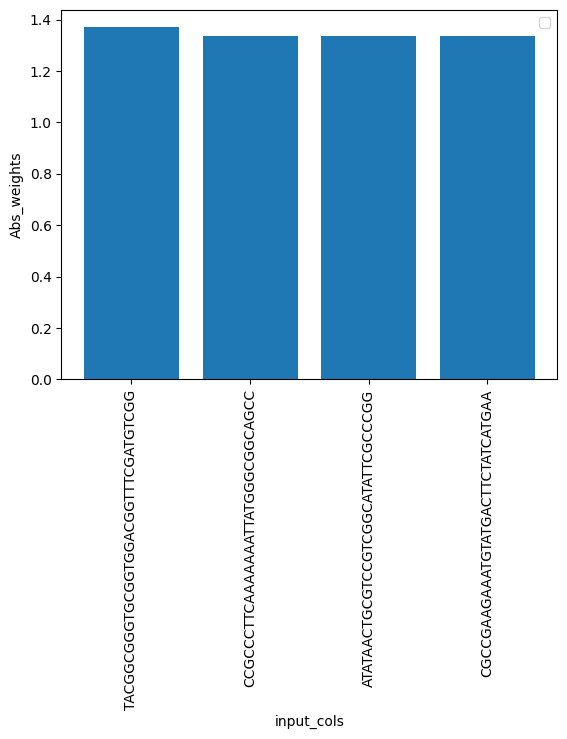

In [14]:
plt.bar(range(4), sum_weights[top_indices])
plt.xticks(range(4), var_cols, rotation = 'vertical')
plt.xlabel('input_cols')
plt.ylabel('Abs_weights')
plt.legend()